In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import spatial
import nevergrad as ng
from sklearn.decomposition import PCA
import json
from es.utils.utils import *
from es.utils.visualize import label_point, draw_pts, draw_traj_with_state, get_poses_for_step, get_track_segment
from es.utils.DataProcessor import paramsDict2Array, rollout_states
from es.planner.lattice_planner import LatticePlanner
import yaml
from argparse import Namespace
# %matplotlib ipympl
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 7)


# Import Data

In [ ]:
map_name = 'General1'

lattice_planner_conf_path = \
    os.path.join(os.path.abspath('..'), 'configs', map_name, 'lattice_planner_config.yaml')
with open(lattice_planner_conf_path) as file:
    lp_conf_dict = yaml.load(file, Loader=yaml.FullLoader)
lp_conf = Namespace(**lp_conf_dict)
ego_planner = LatticePlanner(lp_conf)
opp_planner = LatticePlanner(lp_conf)
waypoints = ego_planner.waypoints
waypoints_xytheta = np.hstack((waypoints[:, :2], waypoints[:, 3].reshape(-1, 1)))

In [ ]:
run = 17
ego_id = -1
s_idx = 0
o_idx = 2

data_module = os.path.abspath('../es_model')
batch_data_dir = os.path.join(data_module, f'{run}/batch_data/{ego_id}')
rollout_data_file = os.path.join(batch_data_dir, f's_{s_idx}_o_{o_idx}.npz')
config_file = f'{run}/config.json'
config_data = json.load(open(os.path.join(data_module, config_file)))
rollout_data = np.load(rollout_data_file, mmap_mode='r')
param_dict = config_data['params_dict']
param_name_list = config_data['params_name']
# print('rollout_states')
# print(rollout_states)
# print(rollout_data.files)
# print('param_dict')
# print(param_dict)

fig_size = (20,12)
font_size = 30
length=0.58
width=0.31

In [ ]:
states = {}
for key in ('ego_x', 'ego_y', 'ego_theta', 'ego_v', 'opp_x', 'opp_y', 'opp_theta', 'opp_v', 'ego_prev_traj', 'ego_prev_opp', 'ego_ittc', 'ego_control_error', 'rollout_ego_s', 'rollout_opp_s'):
    states[key] = rollout_data[key]

feature = {}
for key in ('ego_weights', 'opp_weights', 'objectives'):
    feature[key] = rollout_data[key]
print(feature['objectives'])

In [ ]:
n = len(states['ego_ittc'])
b = 0
e = n
print(n)


# Draw trajectory

In [ ]:
ego_traj = np.vstack((rollout_data['ego_x'], rollout_data['ego_y']))[:, b:e]
opp_traj = np.vstack((rollout_data['opp_x'], rollout_data['opp_y']))[:, b:e]

# wp_x = waypoints_xytheta[idx-100:idx+100, 0]
# wp_y = waypoints_xytheta[idx-100:idx+100, 1]

step = e-1
poses = get_poses_for_step(states, step)
ego_pose = poses[0]
_, _, _, idx = nearest_point(ego_pose[:2], waypoints_xytheta[:, :2])
track_x, track_y = get_track_segment(ego_planner, ego_pose, dist_thres=5)

fig, ax = plt.subplots(1, 1)
ax.plot(track_x, track_y, 'o', c='k', markersize=0.3, label='track')
# ax.plot(wp_x, wp_y, c='b', markersize=1.0, label='optimal raceline')

for i in range(len(poses)):
    car_vertices = get_vertices(poses[i], length, width).T
    if i!=0:
        ax.plot(poses[i][0], poses[i][1], 'go', markersize=5.0, label='opo_position')
        draw_pts(car_vertices, ax, c='g', mksize=5.0, label='opponents', pointonly=True)
    else:
        ax.plot(poses[i][0], poses[i][1], 'ro', markersize=5.0, label='ego_position')
        draw_pts(car_vertices, ax, c='r', mksize=5.0, label='ego', pointonly=True)

draw_pts(pts=ego_traj, ax=ax, mksize=1.0, label='ego_traj', c='r')
draw_pts(pts=opp_traj, ax=ax, mksize=1.0, label='opp_traj', c='g')
# plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
# Draw features

In [ ]:
feature = 'ego_ittc'
fig, ax = plt.subplots(1, 1)
ax.plot(states[feature][b:e], label=feature)
plt.legend()
plt.show()
tmp = states[feature]
tmp = tmp[tmp>0.0]
print(np.nonzero(tmp < 2.0)[0].shape)

In [ ]:
feature = 'ego_v'
fig, ax = plt.subplots(1, 1)
ax.plot(states[feature][b:e], label=feature)
plt.legend()
plt.show()
print(np.mean(states[feature][b:e]))

In [ ]:
feature = 'ego_v'
fig, ax = plt.subplots(1, 1)
ax.plot(states[feature][b:e], label=feature)
plt.legend()
plt.show()

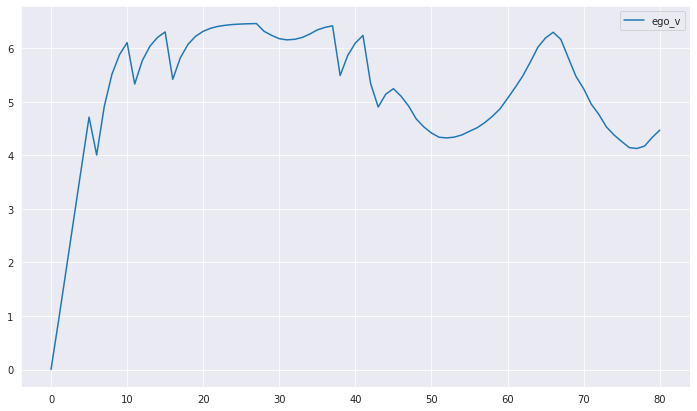

5.220283950617284


In [84]:
feature = 'ego_v'
fig, ax = plt.subplots(1, 1)
ax.plot(states[feature][b:e], label=feature)
plt.legend()
plt.show()
print(np.mean(states[feature][b:e]))

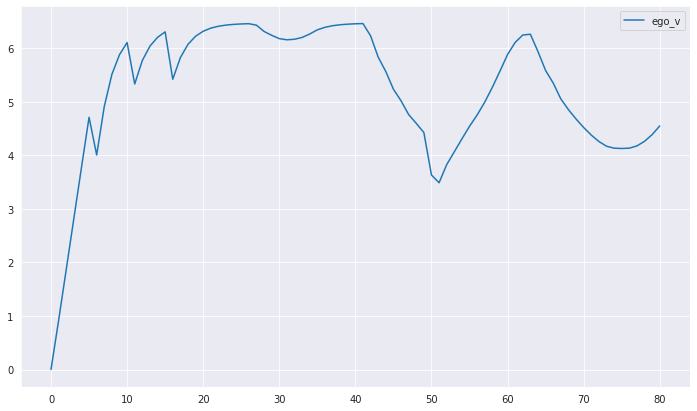

In [77]:
feature = 'ego_v'
fig, ax = plt.subplots(1, 1)
ax.plot(states[feature][b:e], label=feature)
plt.legend()
plt.show()